## Importando as Bibliotecas Necessárias

In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from numpy.linalg import inv
import matplotlib.pyplot as plt

## Lendo os Dados que estão no Fomato do Matlab

In [2]:
grupo3 = loadmat("GrupoRobo_3.mat")

## Transformando os Dados em um DataFrame

In [3]:
dados = pd.DataFrame(grupo3['z1'])

## Isolando os Dados de Saída e de Entrada

In [4]:
Y = dados[0]
U = dados[1]

## Organizando a Matriz X

In [5]:
X = []
a = 0
a1 = 0
b = 0
b1 = 0
for i in range(len(Y)):
    k=i-2
    if(k==-2 and (k+1)==-1):
        X.append([a,a1,b,b1])
    elif(k==-1):
        a=Y[k+1]
        b=U[k+1]
        X.append([a,a1,b,b1])
    else:
        a=Y[i-1]
        b=U[i-1]
        a1=Y[i-2]
        b1=U[i-1]
        X.append([a,a1,b,b1])

## Transformando X em um array

In [6]:
X = np.array(X)

In [7]:
print("Array X : ")
print("\n")
print(X)
print("\n")

Array X : 


[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.07273829e-03 0.00000000e+00 1.00000000e+02 0.00000000e+00]
 [3.06437632e-01 2.07273829e-03 1.00000000e+02 1.00000000e+02]
 [1.19984983e+00 3.06437632e-01 1.00000000e+02 1.00000000e+02]
 [2.66354096e+00 1.19984983e+00 1.00000000e+02 1.00000000e+02]
 [4.58120577e+00 2.66354096e+00 1.00000000e+02 1.00000000e+02]
 [6.95541151e+00 4.58120577e+00 1.00000000e+02 1.00000000e+02]
 [9.72158156e+00 6.95541151e+00 1.00000000e+02 1.00000000e+02]
 [1.28211233e+01 9.72158156e+00 1.00000000e+02 1.00000000e+02]
 [1.62235408e+01 1.28211233e+01 1.00000000e+02 1.00000000e+02]
 [1.98845163e+01 1.62235408e+01 1.00000000e+02 1.00000000e+02]
 [2.37565983e+01 1.98845163e+01 1.00000000e+02 1.00000000e+02]
 [2.77879262e+01 2.37565983e+01 1.00000000e+02 1.00000000e+02]
 [3.19740943e+01 2.77879262e+01 1.00000000e+02 1.00000000e+02]
 [3.62518250e+01 3.19740943e+01 1.00000000e+02 1.00000000e+02]
 [4.05889302e+01 3.62518250e+01 1.00000000

## Transformando Y e U em um array

In [8]:
Y = np.array(Y)
U = np.array(U)
print("Array Y : ")
print("\n")
print(Y)
print("\n\n")
print("Array U : ")
print("\n")
print(U)
print("\n")

Array Y : 


[2.07273829e-03 3.06437632e-01 1.19984983e+00 2.66354096e+00
 4.58120577e+00 6.95541151e+00 9.72158156e+00 1.28211233e+01
 1.62235408e+01 1.98845163e+01 2.37565983e+01 2.77879262e+01
 3.19740943e+01 3.62518250e+01 4.05889302e+01 4.49426484e+01
 4.93452467e+01 5.36755275e+01 5.80088724e+01 6.22149129e+01
 6.63595282e+01 7.04025183e+01 7.42813554e+01 7.80620348e+01
 8.16740621e+01 8.51178280e+01 8.83787487e+01 9.14850842e+01
 9.43809345e+01 9.71158807e+01 9.96392256e+01 1.01987242e+02
 1.04126868e+02 1.06099368e+02 1.07863580e+02 1.09449767e+02
 1.10846864e+02 1.12110236e+02 1.13191254e+02 1.14074761e+02
 1.14846130e+02 1.15433601e+02 1.15890958e+02 1.16231386e+02
 1.16433923e+02 1.16536626e+02 1.16505331e+02 1.16400383e+02
 1.16196378e+02 1.15906672e+02 1.15545767e+02 1.15109719e+02
 1.14611515e+02 1.14090843e+02 1.13495219e+02 1.12896043e+02
 1.12231729e+02 1.11569337e+02 1.10885842e+02 1.10160722e+02
 1.09446525e+02 1.08749915e+02 1.08030607e+02 1.07323023e+02
 1.06629687

## Obter os Parâmetros Estimados

In [9]:
o = (inv(X.T @ X)@(X.T))@Y

In [10]:
print("Parâmetros O (Estimados) : ")
print("\n")
print(o)
print("\n")

Parâmetros O (Estimados) : 


[ 1.91655131 -0.9227192   0.00302465  0.00315749]




## Obter a Soma do Quadrado dos Erros

In [11]:
e = (Y-X@(o.T))@((Y-X@(o.T)).T)

In [12]:
print("Soma do Quadrado dos Erros : ")
print("\n")
print(e)
print("\n")

Soma do Quadrado dos Erros : 


0.07806661461073164




## Comparando os Dados Preditos com os Valores Corretos

In [13]:
Comparar = pd.DataFrame({'Correto':Y,'Predito':X@(o.T)})

In [14]:
print("Data Frame para Comparar:")
print("\n")
print(Comparar)

Data Frame para Comparar:


        Correto     Predito
0      0.002073    0.000000
1      0.306438    0.306438
2      1.199850    1.203605
3      2.663541    2.635032
4      4.581206    4.615903
5      6.955412    6.940630
6      9.721582    9.721451
7     12.821123   12.832233
8     16.223541   16.220265
9     19.884516   19.881166
10    23.756598   23.758138
11    27.787926   27.801129
12    31.974094   31.954531
13    36.251825   36.257754
14    40.588930   40.593586
15    44.942648   44.958727
16    49.345247   49.300921
17    53.675527   53.721467
18    58.008872   57.958310
19    62.214913   62.267755
20    66.359528   66.330387
21    70.402518   70.392760
22    74.281355   74.317042
23    78.062035   78.020488
24    81.674062   81.687277
25    85.117828   85.121407
26    88.378749   88.388674
27    91.485084   91.460767
28    94.380935   94.405304
29    97.115881   97.089074
..          ...         ...
120  100.141631  100.154345
121  100.205540  100.202998
122  100.255063  100

## Gráfico com os Valores Preditos e Corretos no Decorrer do Tempo

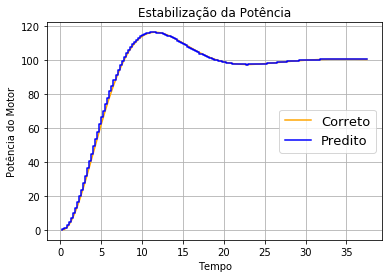

In [15]:
T = 0.25
aux = 0
Amostragem = []
for i in range(len(Y)):
    aux += T
    Amostragem.append(aux)


plt.plot(Amostragem,Y,color='orange',label='Correto')
plt.step(Amostragem,X@(o.T),color='blue',label='Predito')
plt.title('Estabilização da Potência') 
plt.legend(loc='center right',fontsize=13)
plt.xlabel('Tempo')
plt.ylabel('Potência do Motor')
plt.grid(True)
plt.show()